In [1]:
%pylab
import importlib.util
import sys
sys.path.append('/Users/collinshuff/Documents/UVa-Fall18/CS4457/Networks-Final/receiver/')
from receive import *
import scipy.fftpack
import matplotlib.pyplot as plt
%matplotlib inline

Using matplotlib backend: MacOSX
Populating the interactive namespace from numpy and matplotlib


In [2]:
frequency = int(88.1e6)  # Pick a radio station  
offset = 250000         # Offset to capture at  
samp_rate = 2**21         # Sample rate  
baud = 300
samp_per_bit = samp_rate/baud
n_bits = 44

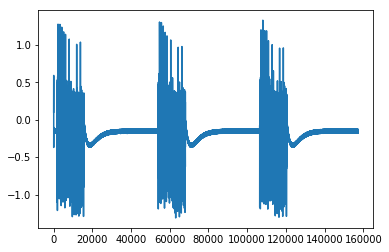

In [5]:
time = 1542489238
end = 1542489240
path = '/Users/collinshuff/Documents/UVa-Fall18/CS4457/Networks-Final/receiver/samples'
samples = np.load(f'{path}/{time}.npy')
time += 1
while time <= end:
    samples = np.concatenate([samples, np.load(f'{path}/{time}.npy')])
    time += 1

fm_demodulated_wave, new_samp_rate = fm_demodulate(samples, frequency, offset, samp_rate)
plt.plot(fm_demodulated_wave)

max around carrier freq: 441266.24061524955
False


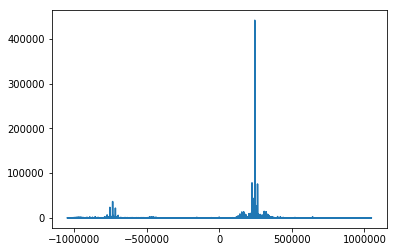

In [6]:
samples = samples[:samp_rate]
fft = scipy.fftpack.fft(samples)
freqs = scipy.fftpack.fftfreq(len(samples)) * samp_rate
plt.plot(freqs, np.abs(fft))
print(detect_transmitter_on(samples, samp_rate, offset))